In [7]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [41]:
import pandas as pd
import ast
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Read evalutaion input from Google Vision Model 
file= 'Google+Openai_Evaluation_Input.csv'
df= pd.read_csv(file)

In [43]:
unique_strings_occurrence = df['ground_truth'].value_counts()

unique_strings_occurrence

[None]                                                                          400
[Tower Bridge]                                                                   91
[The British Museum]                                                             72
[Lastminute.com London Eye]                                                      60
[Tower Of London]                                                                36
[The Shard,Tower Bridge]                                                         29
[Westminster Bridge,Palace Of Westminster,Big Ben]                               25
[Palace Of Westminster]                                                          23
[Big Ben]                                                                        22
[Palace Of Westminster,Big Ben]                                                  20
[The Shard]                                                                      17
[30 St Mary Axe (The Gherkin)]                                              

In [44]:
report = classification_report(df['ground_truth_single'], df['description'], output_dict=True)
print(report)

{'30 St Mary Axe (The Gherkin)': {'precision': 1.0, 'recall': 0.4444444444444444, 'f1-score': 0.6153846153846153, 'support': 18}, 'Big Ben': {'precision': 0.30303030303030304, 'recall': 0.5172413793103449, 'f1-score': 0.38216560509554137, 'support': 58}, 'Lastminute.com London Eye': {'precision': 0.5789473684210527, 'recall': 0.8208955223880597, 'f1-score': 0.6790123456790124, 'support': 67}, 'None': {'precision': 0.9382022471910112, 'recall': 0.835, 'f1-score': 0.8835978835978836, 'support': 400}, 'Palace Of Westminster': {'precision': 0.7142857142857143, 'recall': 0.11363636363636363, 'f1-score': 0.19607843137254902, 'support': 44}, 'The British Museum': {'precision': 0.6428571428571429, 'recall': 1.0, 'f1-score': 0.782608695652174, 'support': 72}, 'The Shard': {'precision': 0.8, 'recall': 0.08695652173913043, 'f1-score': 0.1568627450980392, 'support': 46}, 'Tower Bridge': {'precision': 0.6171875, 'recall': 0.6810344827586207, 'f1-score': 0.6475409836065574, 'support': 116}, 'Tower O

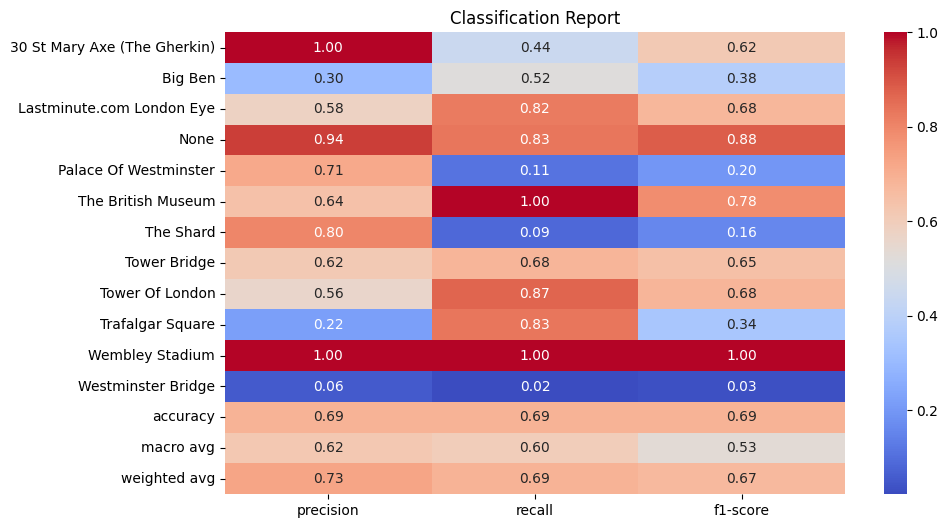

In [45]:
df_model1 = pd.DataFrame(report).transpose()

# Drop the 'support' column if you don't want to visualize it
df_model1 = df_model1.drop(columns=['support'])

# Visualization with Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_model1 , annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report")
plt.show()

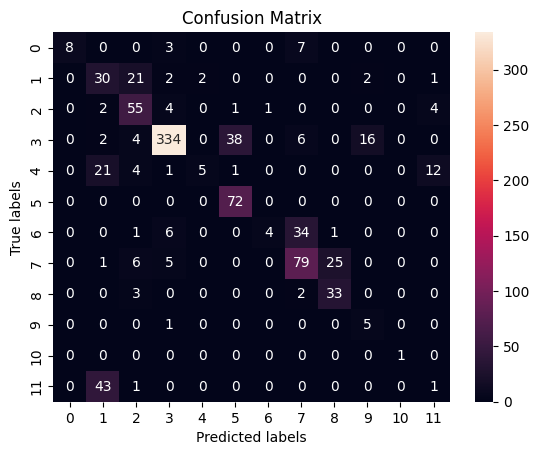

In [46]:
# confusion matrix 
conf_matrix = confusion_matrix(df['ground_truth_single'], df['description'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


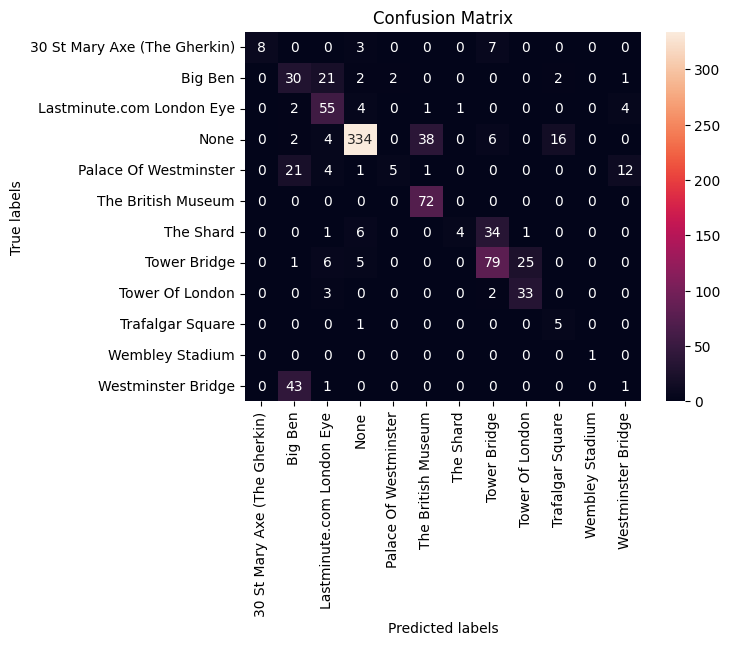

In [47]:
class_labels = sorted(df['ground_truth_single'].unique())

# Generate the confusion matrix
conf_matrix = confusion_matrix(df['ground_truth_single'], df['description'], labels=class_labels)

# Create a heatmap with class names
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

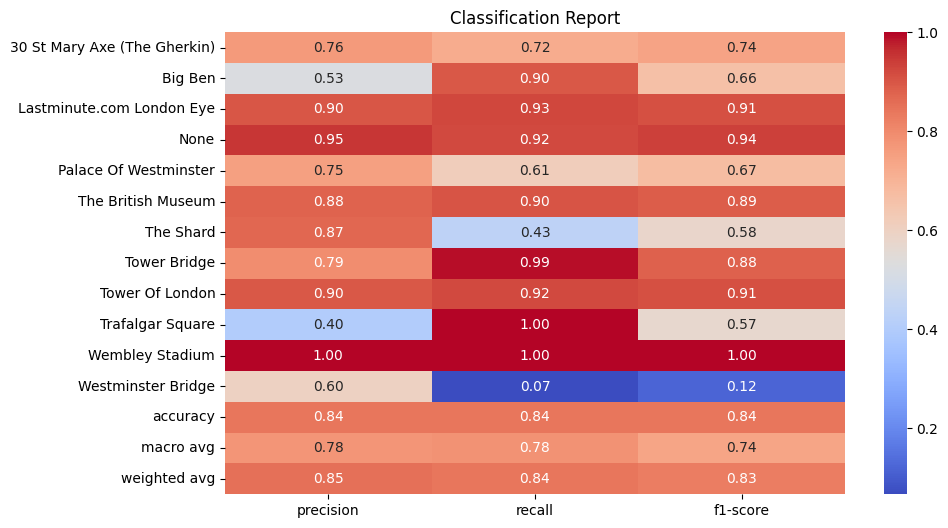

{'30 St Mary Axe (The Gherkin)': {'precision': 0.7647058823529411, 'recall': 0.7222222222222222, 'f1-score': 0.7428571428571428, 'support': 18}, 'Big Ben': {'precision': 0.5252525252525253, 'recall': 0.896551724137931, 'f1-score': 0.6624203821656051, 'support': 58}, 'Lastminute.com London Eye': {'precision': 0.8985507246376812, 'recall': 0.9253731343283582, 'f1-score': 0.9117647058823529, 'support': 67}, 'None': {'precision': 0.9510309278350515, 'recall': 0.9225, 'f1-score': 0.9365482233502538, 'support': 400}, 'Palace Of Westminster': {'precision': 0.75, 'recall': 0.6136363636363636, 'f1-score': 0.6749999999999999, 'support': 44}, 'The British Museum': {'precision': 0.8783783783783784, 'recall': 0.9027777777777778, 'f1-score': 0.8904109589041096, 'support': 72}, 'The Shard': {'precision': 0.8695652173913043, 'recall': 0.43478260869565216, 'f1-score': 0.5797101449275363, 'support': 46}, 'Tower Bridge': {'precision': 0.7931034482758621, 'recall': 0.9913793103448276, 'f1-score': 0.881226

In [48]:
report_2 = classification_report(df['ground_truth_single'], df['detections_vision_openai'], output_dict=True)
df_model2 = pd.DataFrame(report_2).transpose()

# Drop the 'support' column if you don't want to visualize it
df_model2 = df_model2.drop(columns=['support'])

# Visualization with Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_model2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report")
plt.show()

print(report_2)

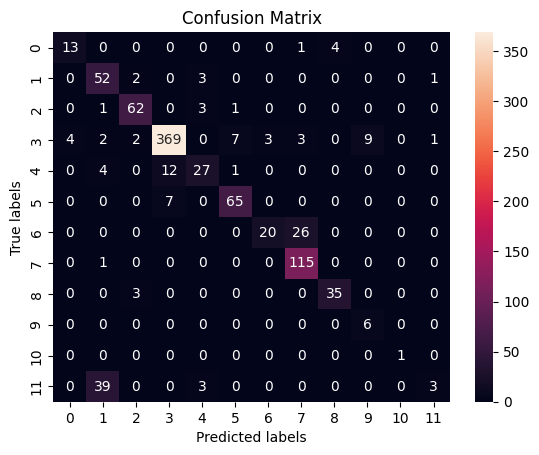

In [49]:
# confusion matrix 
conf_matrix_2 = confusion_matrix(df['ground_truth_single'], df['detections_vision_openai'])
sns.heatmap(conf_matrix_2, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


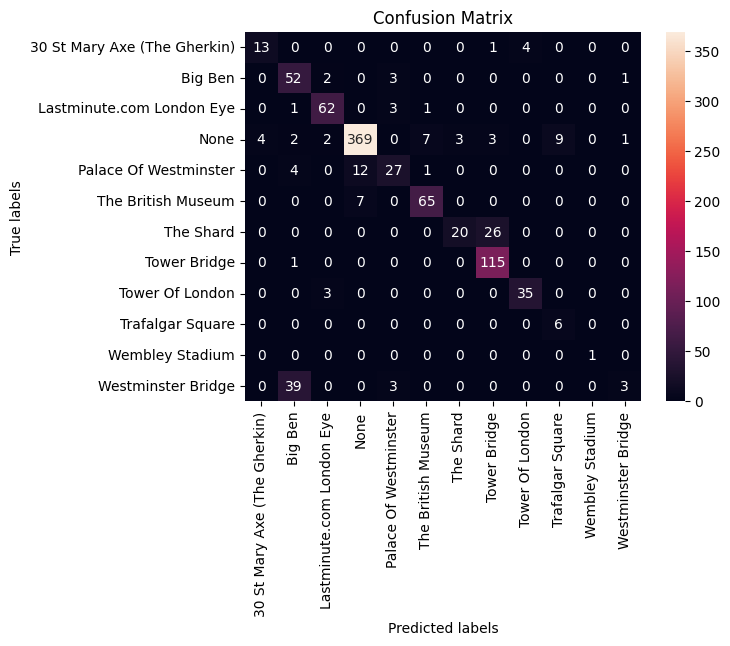

In [51]:
class_labels = sorted(df['ground_truth_single'].unique())

# Generate the confusion matrix
conf_matrix = confusion_matrix(df['ground_truth_single'], df['detections_vision_openai'], labels=class_labels)

# Create a heatmap with class names
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
df_model2_f1_score = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_f1_score = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model2_recall = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_recall = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model2_precision = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_precision = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])

In [22]:
def plot_metric_comparison(df1, df2, metric, label1='Model 1', label2='Model 2', color1='blue', color2='red'):
    """
    Plots a comparison of a specified metric between two models.

    Parameters:
    - df1: DataFrame for the first model.
    - df2: DataFrame for the second model.
    - metric: The metric to plot (e.g., 'precision').
    - label1: Label for the first model (optional).
    - label2: Label for the second model (optional).
    - color1: Line color for the first model (optional).
    - color2: Line color for the second model (optional).
    """
    plt.figure(figsize=(15, 6))
    
    # Plot metric for both models
    plt.plot(df1.index, df1[metric], marker='o', linestyle='-', color=color1, label=f'{label1} {metric.title()}')
    plt.plot(df2.index, df2[metric], marker='s', linestyle='-', color=color2, label=f'{label2} {metric.title()}')
    
    # Annotate points with metric values
    for i, txt in enumerate(df1[metric]):
        plt.annotate(f"{txt:.2f}", (df1.index[i], df1[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(df2[metric]):
        plt.annotate(f"{txt:.2f}", (df2.index[i], df2[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'{metric.title()} Comparison between Two Models')
    plt.xlabel('Class')
    plt.ylabel(f'{metric.title()} Score')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment
    plt.grid(True)
    plt.tight_layout()
    plt.show()

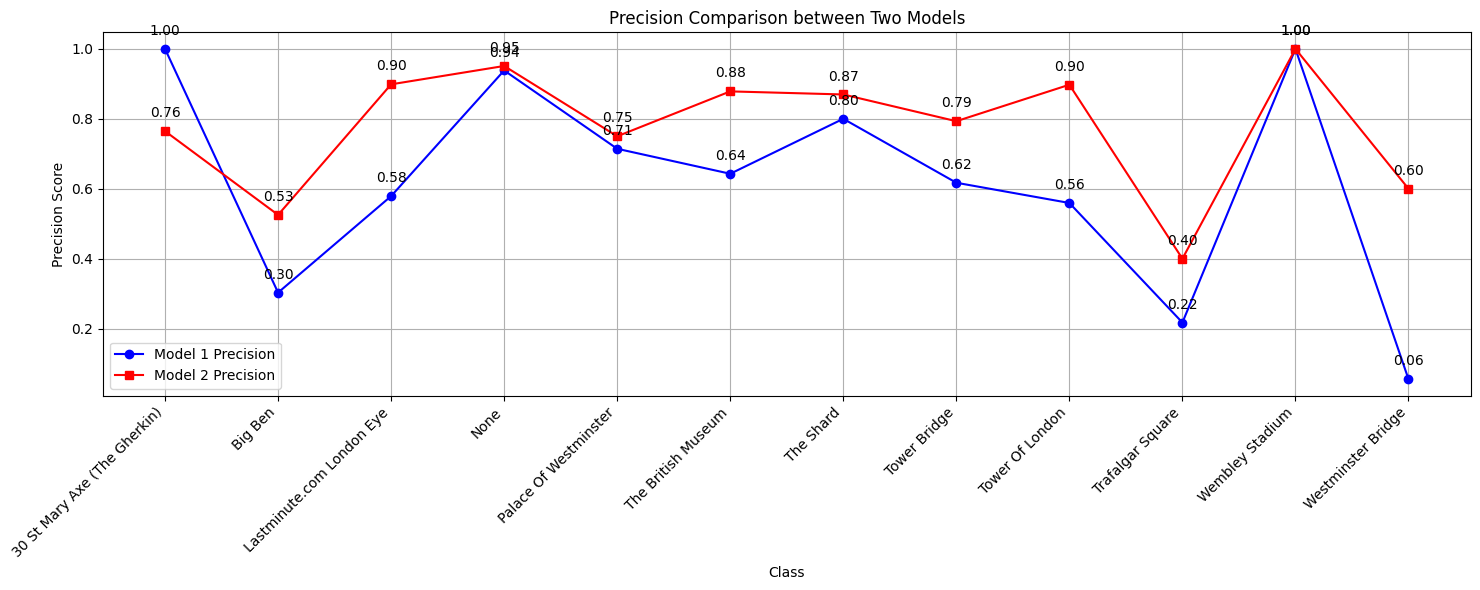

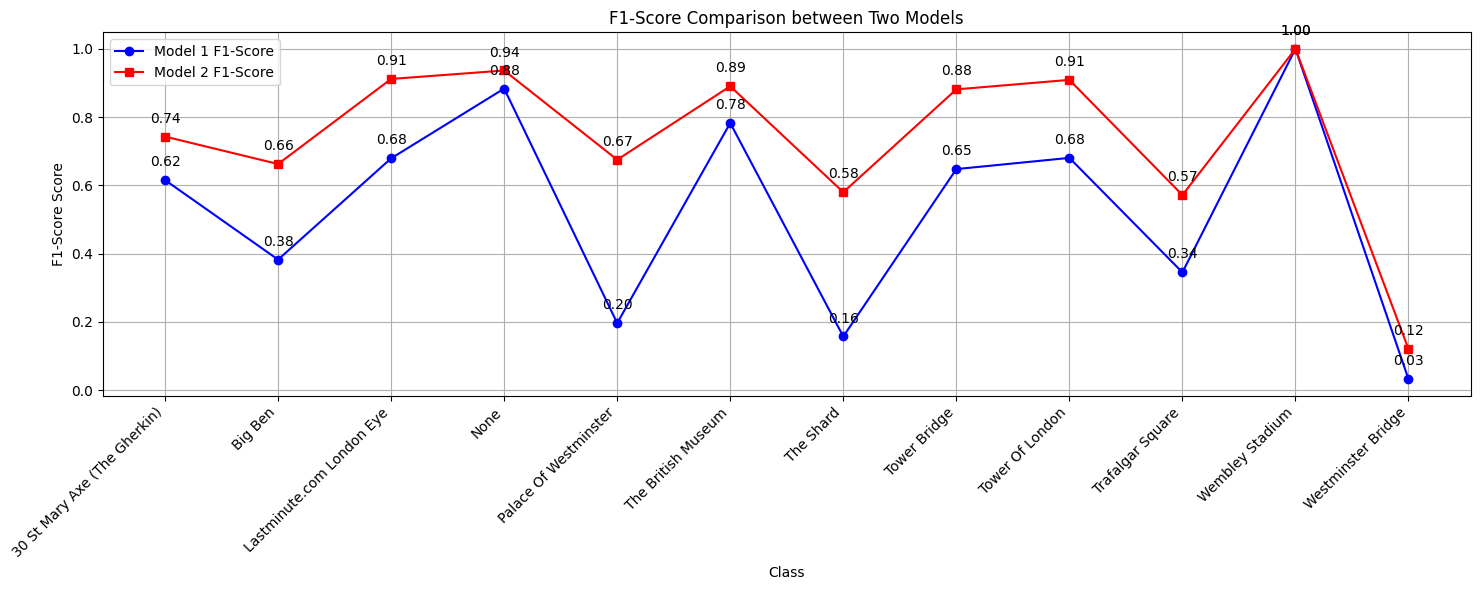

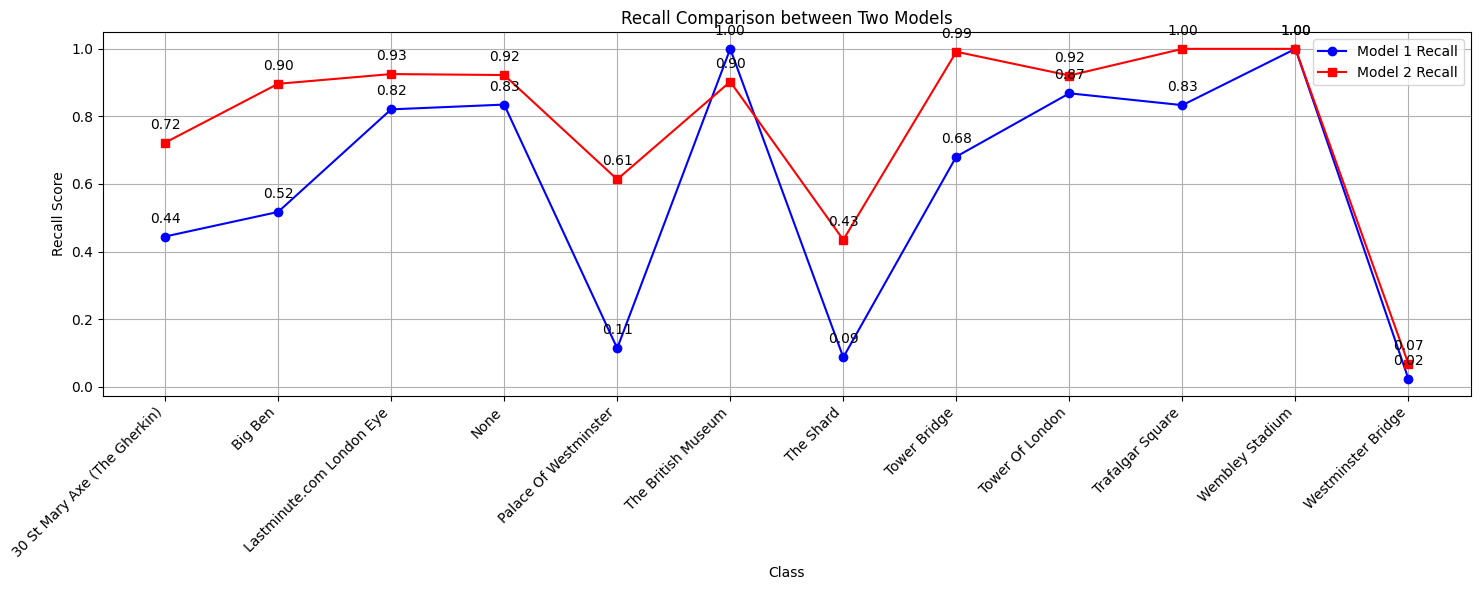

In [23]:
plot_metric_comparison(df_model1_precision, df_model2_precision, 'precision')
plot_metric_comparison(df_model1_f1_score, df_model2_f1_score, 'f1-score')
plot_metric_comparison(df_model1_recall, df_model2_recall, 'recall')

In [37]:
def calculate_metrics_by_class(df, ground_truth_col, detections_col):
    # Extract unique classes from all concatenated ground truths
    all_classes = set(','.join(df[ground_truth_col].dropna()).split(','))
    
    # Initialize dictionaries for metrics
    precision_dict, recall_dict, f1_dict, accuracy_dict = {}, {}, {}, {}

    # Calculate metrics for each class
    for cls in all_classes:
        # True Positives (TP): Class is in both ground truth and any detection
        TP = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Positives (FP): Class is not in ground truth but is in any detection
        FP = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Negatives (FN): Class is in ground truth but not in any detection
        FN = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # True Negatives (TN): Class is not in ground truth and not in any detection
        TN = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()

        # Calculate Precision, Recall, F1 Score, and Accuracy
        precision = round(TP / (TP + FP) if TP + FP > 0 else 0, 2)
        recall = round(TP / (TP + FN) if TP + FN > 0 else 0, 2)
        f1 = round(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0, 2)
        accuracy = round((TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0, 2)

        # Store metrics
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1
        accuracy_dict[cls] = accuracy
    
    # Return these as a DataFrame
    metrics_df = pd.DataFrame({
        'Precision': precision_dict, 
        'Recall': recall_dict, 
        'F1': f1_dict,
        'Accuracy': accuracy_dict
    }).sort_index()  # Sorted by class names
    
    return metrics_df

metrics_df_model_1 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'description')
metrics_df_model_2 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'detections_vision_openai')


# Printing the metrics DataFrame for each model
print("Metrics for Model 1:")
print(metrics_df_model_1)
print("\nMetrics for Model 2:")
print(metrics_df_model_2)

Metrics for Model 1:
                              Precision  Recall    F1  Accuracy
 Lastminute.com London Eye         0.00    0.00  0.00      1.00
30 St Mary Axe (The Gherkin)       1.00    0.28  0.44      0.98
Big Ben                            0.82    0.61  0.70      0.92
Lastminute.com London Eye          0.63    0.83  0.72      0.95
None                               0.94    0.83  0.88      0.90
Palace Of Westminster              0.86    0.05  0.09      0.88
The British Museum                 0.64    1.00  0.78      0.96
The Shard                          0.80    0.07  0.13      0.94
Tower Bridge                       0.85    0.73  0.79      0.94
Tower Of London                    0.56    0.80  0.66      0.96
Trafalgar Square                   0.22    0.83  0.35      0.98
Wembley Stadium                    1.00    1.00  1.00      1.00
Westminster Bridge                 0.06    0.02  0.03      0.91

Metrics for Model 2:
                              Precision  Recall    F1  Accura

In [38]:
def calculate_metrics_by_class(df, ground_truth_col, detections_col):
    # Extract unique classes from all concatenated ground truths
    all_classes = set(','.join(df[ground_truth_col].dropna()).split(','))
    
    # Initialize dictionaries for metrics
    precision_dict, recall_dict, f1_dict, accuracy_dict = {}, {}, {}, {}

    # Calculate metrics for each class
    for cls in all_classes:
        # True Positives (TP): Class is in both ground truth and any detection
        TP = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Positives (FP): Class is not in ground truth but is in any detection
        FP = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Negatives (FN): Class is in ground truth but not in any detection
        FN = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # True Negatives (TN): Class is not in ground truth and not in any detection
        TN = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()

        # Calculate Precision, Recall, F1 Score, and Accuracy
        precision = round(TP / (TP + FP) if TP + FP > 0 else 0, 2)
        recall = round(TP / (TP + FN) if TP + FN > 0 else 0, 2)
        f1 = round(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0, 2)
        accuracy = round((TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0, 2)

        # Store metrics
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1
        accuracy_dict[cls] = accuracy
    
    # Return these as a DataFrame
    metrics_df = pd.DataFrame({
        'Precision': precision_dict, 
        'Recall': recall_dict, 
        'F1': f1_dict,
        'Accuracy': accuracy_dict
    }).sort_index()  # Sorted by class names
    
    return metrics_df

metrics_df_model_1 = calculate_metrics_by_class(df, 'ground_truth_single', 'description')
metrics_df_model_2 = calculate_metrics_by_class(df, 'ground_truth_single', 'detections_vision_openai')


# Printing the metrics DataFrame for each model
print("Metrics for Model 1:")
print(metrics_df_model_1)
print("\nMetrics for Model 2:")
print(metrics_df_model_2)

Metrics for Model 1:
                              Precision  Recall    F1  Accuracy
30 St Mary Axe (The Gherkin)       1.00    0.44  0.61      0.99
Big Ben                            0.30    0.52  0.38      0.89
Lastminute.com London Eye          0.58    0.82  0.68      0.94
None                               0.94    0.84  0.89      0.90
Palace Of Westminster              0.71    0.11  0.19      0.95
The British Museum                 0.64    1.00  0.78      0.96
The Shard                          0.80    0.09  0.16      0.95
Tower Bridge                       0.62    0.68  0.65      0.91
Tower Of London                    0.56    0.87  0.68      0.97
Trafalgar Square                   0.22    0.83  0.35      0.98
Wembley Stadium                    1.00    1.00  1.00      1.00
Westminster Bridge                 0.06    0.02  0.03      0.93

Metrics for Model 2:
                              Precision  Recall    F1  Accuracy
30 St Mary Axe (The Gherkin)       0.76    0.72  0.74      0.

In [39]:
import pandas as pd

def calculate_metrics_by_class(df, ground_truth_col, detections_col):
    # Extract unique classes from all concatenated ground truths
    all_classes = set(','.join(df[ground_truth_col].dropna()).split(','))
    
    # Initialize dictionaries for metrics and counts
    precision_dict, recall_dict, f1_dict, accuracy_dict = {}, {}, {}, {}
    tp_dict, fp_dict, fn_dict, tn_dict = {}, {}, {}, {}

    # Calculate metrics and counts for each class
    for cls in all_classes:
        # True Positives (TP): Class is in both ground truth and detection
        TP = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and cls == x[detections_col], axis=1).sum()
        # False Positives (FP): Class is not in ground truth but is in detection
        FP = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and cls == x[detections_col], axis=1).sum()
        # False Negatives (FN): Class is in ground truth but not in detection
        FN = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and cls != x[detections_col], axis=1).sum()
        # True Negatives (TN): Class is not in ground truth and not in detection
        TN = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and cls != x[detections_col], axis=1).sum()

        # Store counts
        tp_dict[cls] = TP
        fp_dict[cls] = FP
        fn_dict[cls] = FN
        tn_dict[cls] = TN

        # Calculate Precision, Recall, F1 Score, and Accuracy
        precision = round(TP / (TP + FP) if TP + FP > 0 else 0, 2)
        recall = round(TP / (TP + FN) if TP + FN > 0 else 0, 2)
        f1 = round(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0, 2)
        accuracy = round((TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0, 2)

        # Store metrics
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1
        accuracy_dict[cls] = accuracy
    
    # Return these as a DataFrame
    metrics_df = pd.DataFrame({
        'TP': tp_dict,
        'FP': fp_dict,
        'FN': fn_dict,
        'TN': tn_dict,
        'Precision': precision_dict, 
        'Recall': recall_dict, 
        'F1': f1_dict,
        'Accuracy': accuracy_dict
    }).sort_index()  # Sorted by class names
    
    return metrics_df
metrics_df_model_1 = calculate_metrics_by_class(df, 'ground_truth_single', 'description')
metrics_df_model_2 = calculate_metrics_by_class(df, 'ground_truth_single', 'detections_vision_openai')


# Printing the metrics DataFrame for each model
print("Metrics for Model 1:")
print(metrics_df_model_1)
print("\nMetrics for Model 2:")
print(metrics_df_model_2)


Metrics for Model 1:
                               TP  FP  FN   TN  Precision  Recall    F1  \
30 St Mary Axe (The Gherkin)    8   0  10  893       1.00    0.44  0.61   
Big Ben                        30  69  28  784       0.30    0.52  0.38   
Lastminute.com London Eye      55  40  12  804       0.58    0.82  0.68   
None                          334  22  66  489       0.94    0.84  0.89   
Palace Of Westminster           5   2  39  865       0.71    0.11  0.19   
The British Museum             72  40   0  799       0.64    1.00  0.78   
The Shard                       4   1  42  864       0.80    0.09  0.16   
Tower Bridge                   79  49  37  746       0.62    0.68  0.65   
Tower Of London                33  26   5  847       0.56    0.87  0.68   
Trafalgar Square                5  18   1  887       0.22    0.83  0.35   
Wembley Stadium                 1   0   0  910       1.00    1.00  1.00   
Westminster Bridge              1  17  44  849       0.06    0.02  0.03   

   

In [40]:
import pandas as pd

def calculate_metrics_by_class(df, ground_truth_col, detections_col):
    # Extract unique classes from all concatenated ground truths
    all_classes = set(','.join(df[ground_truth_col].dropna()).split(','))
    
    # Initialize dictionaries for metrics and counts
    precision_dict, recall_dict, f1_dict, accuracy_dict = {}, {}, {}, {}
    tp_dict, fp_dict, fn_dict, tn_dict = {}, {}, {}, {}

    # Calculate metrics and counts for each class
    for cls in all_classes:
        # True Positives (TP): Class is in both ground truth and detection
        TP = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and cls == x[detections_col], axis=1).sum()
        # False Positives (FP): Class is not in ground truth but is in detection
        FP = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and cls == x[detections_col], axis=1).sum()
        # False Negatives (FN): Class is in ground truth but not in detection
        FN = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and cls != x[detections_col], axis=1).sum()
        # True Negatives (TN): Class is not in ground truth and not in detection
        TN = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and cls != x[detections_col], axis=1).sum()

        # Store counts
        tp_dict[cls] = TP
        fp_dict[cls] = FP
        fn_dict[cls] = FN
        tn_dict[cls] = TN

        # Calculate Precision, Recall, F1 Score, and Accuracy
        precision = round(TP / (TP + FP) if TP + FP > 0 else 0, 2)
        recall = round(TP / (TP + FN) if TP + FN > 0 else 0, 2)
        f1 = round(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0, 2)
        accuracy = round((TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0, 2)

        # Store metrics
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1
        accuracy_dict[cls] = accuracy
    
    # Return these as a DataFrame
    metrics_df = pd.DataFrame({
        'TP': tp_dict,
        'FP': fp_dict,
        'FN': fn_dict,
        'TN': tn_dict,
        'Precision': precision_dict, 
        'Recall': recall_dict, 
        'F1': f1_dict,
        'Accuracy': accuracy_dict
    }).sort_index()  # Sorted by class names
    
    return metrics_df
metrics_df_model_1 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'description')
metrics_df_model_2 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'detections_vision_openai')


# Printing the metrics DataFrame for each model
print("Metrics for Model 1:")
print(metrics_df_model_1)
print("\nMetrics for Model 2:")
print(metrics_df_model_2)


Metrics for Model 1:
                               TP  FP   FN   TN  Precision  Recall    F1  \
 Lastminute.com London Eye      0   0    1  910       0.00    0.00  0.00   
30 St Mary Axe (The Gherkin)    8   0   21  882       1.00    0.28  0.44   
Big Ben                        81  18   51  761       0.82    0.61  0.70   
Lastminute.com London Eye      60  35   12  804       0.63    0.83  0.72   
None                          334  22   67  488       0.94    0.83  0.88   
Palace Of Westminster           6   1  105  799       0.86    0.05  0.09   
The British Museum             72  40    0  799       0.64    1.00  0.78   
The Shard                       4   1   53  853       0.80    0.07  0.13   
Tower Bridge                  109  19   40  743       0.85    0.73  0.79   
Tower Of London                33  26    8  844       0.56    0.80  0.66   
Trafalgar Square                5  18    1  887       0.22    0.83  0.35   
Wembley Stadium                 1   0    0  910       1.00    1.00 